<a href="https://colab.research.google.com/github/BarnaliBhowmik/NeuroQuanta/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Content List:**

1. Tensor Basics (*Create, Operations, NumPy, GPU Support*).
2. Autograd (*Linear regression*).
3. Training Loop with: Model, Loss & Optimizer (*Pytorch pipeline*).
4. Neural Network (*GPU, Datasets, DataLoader, Transformations & Evaluation*).
5. Convolution Neural Network (*Save/Load Model*).

**TENSOR**
1.   Multidimesional matrix containing elements of a single data type.
2.   It's a generic n-dimensional array to be used for arbitrary numeric computation.
3.   PyTorch Tensor can run on either CPU or GPU.

In [ ]:
import torch

# torch.empty(size): uninitiallized
x = torch.empty(1) # scalar
print("empty(1):", x)
x = torch.empty(3) # vector
print("empty(3):",x)
x = torch.empty(2, 3) # matrix
print("empty(2,3):",x)
x = torch.empty(2, 2, 3) # tensor, 3 dimensions
#x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print("empty(2, 2, 3):",x)

# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print("rand(5,3):", x)

# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print("zeros(5,3):", x)

empty(1): tensor([8.5400e-26])
empty(3): tensor([5.0798e+03, 0.0000e+00, 3.3631e-44])
empty(2,3): tensor([[5.0195e+03, 0.0000e+00, 5.0201e+03],
        [0.0000e+00, 1.5157e-36, 2.2053e-38]])
empty(2, 2, 3): tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 1.6816e-44, 0.0000e+00]],

        [[9.1084e-44, 0.0000e+00, 4.9529e+03],
         [0.0000e+00, 4.1600e+03, 0.0000e+00]]])
rand(5,3): tensor([[0.7761, 0.4697, 0.2445],
        [0.5553, 0.6315, 0.5021],
        [0.1986, 0.6937, 0.6757],
        [0.2039, 0.7758, 0.5637],
        [0.2741, 0.7031, 0.2975]])
zeros(5,3): tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# check size
print("size", x.size())  # x.size(0)
print("shape", x.shape)  # x.shape[0]

size torch.Size([5, 3])
shape torch.Size([5, 3])


In [ ]:
# check data type
print(x.dtype)

# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [ ]:
# construct from data
x = torch.tensor([5.5, 3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


In [ ]:
# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


In [ ]:
# Operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x,y)

# in place addition, everythin with a trailing underscore is an inplace operation
# i.e. it will modify the variable
# y.add_(x)

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.6023, 0.6990],
        [0.2501, 0.9016]])
tensor([[1.6023, 1.6990],
        [1.2501, 1.9016]])


In [ ]:
# subtraction
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x,y)

# division
z = x / y
z = torch.div(x,y)

In [ ]:
# Slicing
x = torch.rand(5,3)
print(x)
print("x[:, 0]", x[:, 0]) # all rows, column 0
print("x[1, :]", x[1, :]) # row 1, all columns
print("x[1, 1]", x[1,1]) # element at 1, 1

# Get the actual value if only 1 element in your tensor
print("x[1,1].item()", x[1,1].item())

tensor([[0.9519, 0.8374, 0.9181],
        [0.7771, 0.7888, 0.1869],
        [0.7420, 0.3148, 0.8746],
        [0.1402, 0.2799, 0.7464],
        [0.1934, 0.4391, 0.3729]])
x[:, 0] tensor([0.9519, 0.7771, 0.7420, 0.1402, 0.1934])
x[1, :] tensor([0.7771, 0.7888, 0.1869])
x[1, 1] tensor(0.7888)
x[1,1].item() 0.7888021469116211


In [ ]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [ ]:
a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
# Careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
# numpy to torch with .from_numpy(x), or torch.tensor() to copy it
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)
print(a)
print(b)
print(c)

# again be careful when modifying
a += 1
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2,2).to(device)  # move tensors to GPU device
#x = x.to("cpu")
#x = x.to("cuda")

x = torch.rand(2,2, device=device)  # or directy create them on GPU

# **WHAT IS PyTorch ?**

> Its an open-source based deep learning library.
> Its a platform which keeps track and analyzes research papers.
> Its most popular due to the user friendly interface & efficiency.
> It's both flexible & accessible at the same time, providing advanced users the ability to tweak lower-level aspects of their models for customizing and optimizing.

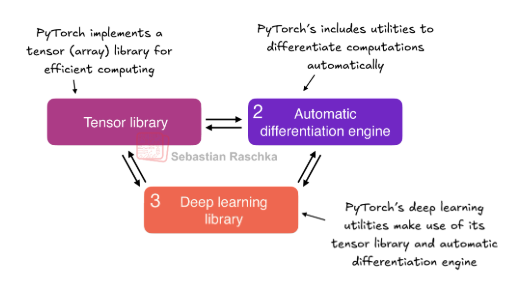

PyTorch serves as a versatile deep learning built around three compenents-
1. At its core, PyTorch functions like NumPy but with the added benefit of GPU acceleration. This enables faster and more efficient numerical computations, making it suitable for large-scale machine learning tasks.
2. PyTorch includes a powerful autograd system that automatically tracks operations on tensors and computes gradients. This simplifies the implementation of backpropagation, making model training and optimization more intuitive and less error-prone.
3. It offers a rich ecosystem for building neural networks, including modules for defining models, loss functions, optimizers, and access to a suite of pre-trained networks. It supports both rapid experimentation and production deployment, catering to both researchers and developers.

**Defining Deep Learning.**

1.   *Deep learning is a subcategory of machine learning that is focused on the implementation of deep neural networks.*

2.   *In turn, machine learning is a subcategory of AI that is concerned with algorithms that learn from data.*

3.   *AI is the broader concept of machines being able to perform tasks that typically require human intelligence.*


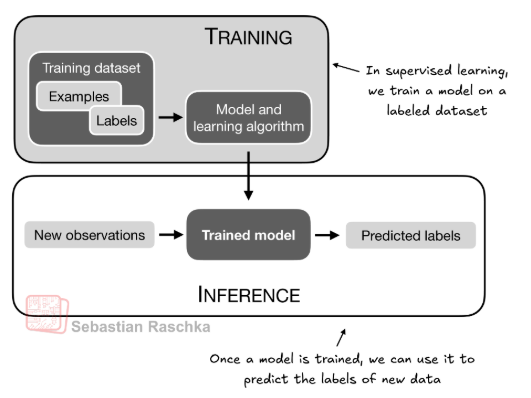

**Example:**  In the case of an email spam classifier, for example, the training dataset consists of emails and their spam and not-spam labels that a human identified.

Then, the trained model can be used on new observations (*new emails*) to predict their unknown label (*spam or not spam*).